## Analysis of Epinions Dataset 

The goal of this task is to train linear regression models to predict users' ratings towards items using a cleaned Epinions sub-dataset. The process follows a standard Data Science workflow, including data exploration, model development, prediction generation, and performance evaluation. Additionally, the task examines the impact of feature selection and varying training/testing data sizes on model accuracy and performance.

--------
### Import Cleaned Epinions Dataset

In [5]:
# Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score 
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import math

# Import the data 
df=pd.read_csv('Data/Portfolio 1.csv')

# Print data's total length
print("The total length of the dataset is", len(df))

The total length of the dataset is 2899


--------
### Dataset Exploration

1. **Analyze Correlations:**  
   - Use the `corr()` method to compute correlations between features such as helpfulness, gender, category, and review, and their impact on the target variable (rating).

2. **Convert Categorical Features:**  
   - Transform categorical features (e.g., gender, category, and review) into numerical values to enable correlation analysis and ensure compatibility with machine learning models.

3. **Identify Key Correlations:**  
   - Determine the most and least correlated features with ratings, considering both positive and negative correlations. 
   - Discuss the potential impact of these correlations on the final prediction results, highlighting how strongly or weakly certain features influence model accuracy and reliability.


In [7]:
# Print the first 5 rows of the dataset
df.head()

,userId,timestamp,review,item,rating,helpfulness,gender,category
0,4259,11900,"Finally, Something for (Relatively) Nothing",MyPoints.com,4.0,4.0,F,Online Stores & Services
1,4259,12000,Shocking!,Sixth Sense,5.0,4.0,F,Movies
2,4259,12000,Simply Shaggadelic!,Austin Powers: The Spy Who Shagged Me,5.0,4.0,F,Movies
3,4259,12000,Better Than The First!,Toy Story 2,5.0,3.0,F,Movies
4,4259,12000,Blair Witch made me appreciate this,Star Wars Episode I: The Phantom Menace,2.0,4.0,F,Movies


In [8]:
# Print the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2899 entries, 0 to 2898
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2899 non-null   int64  
 1   timestamp    2899 non-null   int64  
 2   review       2899 non-null   object 
 3   item         2899 non-null   object 
 4   rating       2899 non-null   float64
 5   helpfulness  2899 non-null   float64
 6   gender       2899 non-null   object 
 7   category     2899 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 181.3+ KB


In [9]:
# Use OrdinalEncoder to encode categorical features as an integer array
ord_enc=OrdinalEncoder(dtype=int)

df["category_code"] = ord_enc.fit_transform(df[["category"]])
df["gender_code"] = ord_enc.fit_transform(df[["gender"]])
df["review_code"] = ord_enc.fit_transform(df[["review"]])

df[["category", "category_code", "review", "review_code", "gender", "gender_code"]].head(11)

,category,category_code,review,review_code,gender,gender_code
0,Online Stores & Services,6,"Finally, Something for (Relatively) Nothing",856,F,0
1,Movies,5,Shocking!,1985,F,0
2,Movies,5,Simply Shaggadelic!,2006,F,0
3,Movies,5,Better Than The First!,472,F,0
4,Movies,5,Blair Witch made me appreciate this,493,F,0
5,Hotels & Travel,2,Come here at least once in your life... stay a...,599,F,0
6,Online Stores & Services,6,"I joined for the free camera, and stood for no...",1232,F,0
7,Movies,5,They Should've Fooled the American Public,2415,F,0
8,Hotels & Travel,2,A Short List of Things to Remember in NYC,136,F,0
9,Movies,5,Do you know what a metaphysical can of worms t...,692,F,0


In [10]:
# Get the correlations between helpfulness/category/gender/review and rating
corr_helpfulness = df['helpfulness'].corr(df['rating']) 
corr_category = df['category_code'].corr(df['rating'])
corr_gender = df['gender_code'].corr(df['rating'])
corr_review = df['review_code'].corr(df['rating'])

print('corr_helpfulness: ', corr_helpfulness)
print('corr_category: ', corr_category)
print('corr_gender: ', corr_gender)
print('corr_review: ', corr_review)

corr_helpfulness:  -0.016832209821488652
corr_category:  -0.14057638180137574
corr_gender:  0.018105039011507486
corr_review:  -0.062071079458250855


**Explanation of Correlations:**  

- Ratings exhibit a stronger correlation with item categories and item reviews compared to other features.  
- Ratings is relatively less correlated with rating helpfulness and user gender.  
- Overall, the correlation values across all four features are relatively low, indicating limited predictive power. As a result, these features may not significantly enhance the accuracy of rating predictions when used as input variables.

-----
### Split Training and Testing Data
To evaluate the impact of training and testing data size on model performance, the dataset was randomly split into training and testing sets with varying proportions:  

* Case 1: Training set comprises 10% of the entire dataset.  
* Case 2: Training set comprises 90% of the entire dataset.  

In [11]:
# Case 1 
train_case1, test_case1 = train_test_split(df, test_size=0.9, random_state=142)
print('Case 1 train shape: ', train_case1.shape)
print('Case 1 test shape: ', test_case1.shape)

# Case 2 
train_case2, test_case2 = train_test_split(df, test_size=0.1, random_state=142)
print('Case 2 train shape: ', train_case2.shape)
print('Case 2 test shape: ', test_case2.shape)

Case 1 train shape:  (289, 11)
Case 1 test shape:  (2610, 11)
Case 2 train shape:  (2609, 11)
Case 2 test shape:  (290, 11)


-----
### Train Linear Regression Models with Feature Selection under Cases 1 & 2
This section focuses on evaluating the impact of feature selection and data partitioning on model performance by training multiple linear regression models under different conditions.

1. **Training Four Linear Regression Models:**  
   Train models using the following configurations to analyze performance variations:
   - **Model A:** Case 1 training/testing data with the two **most correlated** input features.
   - **Model B:** Case 1 training/testing data with the two **least correlated** input features.
   - **Model C:** Case 2 training/testing data with the two **most correlated** input features.
   - **Model D:** Case 2 training/testing data with the two **least correlated** input features.

2. **Performance Analysis:**  
   - Compare **Model A and Model C** (or **Model B and Model D**) to assess the impact of training/testing data size on performance.  
   - Compare **Model A and Model B** (or **Model C and Model D**) to evaluate the effects of feature selection on model accuracy.

In [12]:
# Model A 
regA = linear_model.LinearRegression()

X_train_A = train_case1[["category_code","review_code"]] 
y_train_A = train_case1["rating"]
X_test_A = test_case1[["category_code","review_code"]]
y_test_A= test_case1["rating"]


regA.fit(X_train_A, y_train_A)

# Model B 
regB = linear_model.LinearRegression()

X_train_B = train_case1[["helpfulness","gender_code"]] 
y_train_B = train_case1["rating"]
X_test_B = test_case1[["helpfulness","gender_code"]]
y_test_B = test_case1["rating"]


regB.fit(X_train_B, y_train_B)

# Model C
regC = linear_model.LinearRegression()

X_train_C = train_case2[["category_code","review_code"]] 
y_train_C = train_case2["rating"]
X_test_C = test_case2[["category_code","review_code"]]
y_test_C = test_case2["rating"]


regC.fit(X_train_C, y_train_C)

# Model D
regD = linear_model.LinearRegression()

X_train_D = train_case2[["helpfulness","gender_code"]] 
y_train_D = train_case2["rating"]
X_test_D = test_case2[["helpfulness","gender_code"]]
y_test_D = test_case2["rating"]


regD.fit(X_train_D, y_train_D)

LinearRegression()

----
### Evaluate Models
Evaluate the performance of the four models with two metrics, including MSE and Root MSE

In [13]:
# Evaluate Model A
predicted_a = regA.predict(X_test_A)
mse_a = ((np.array(y_test_A)-predicted_a)**2).sum()/len(y_test_A)
root_mse_a = np.sqrt(mse_a)

print("Model A MSE:", mse_a)
print("Model A Root MSE:", root_mse_a)

# Evaluate Model B
predicted_b = regB.predict(X_test_B)
mse_b = ((np.array(y_test_B)-predicted_b)**2).sum()/len(y_test_B)
root_mse_b = np.sqrt(mse_b)

print("Model B MSE:", mse_b)
print("Model B Root MSE:", root_mse_b)

# Evaluate Model C
predicted_c = regC.predict(X_test_C)
mse_c = ((np.array(y_test_C)-predicted_c)**2).sum()/len(y_test_C)
root_mse_c = np.sqrt(mse_c)

print("Model C MSE:", mse_c)
print("Model C Root MSE:", root_mse_c)

# Evaluate Model D
predicted_d = regD.predict(X_test_D)
mse_d = ((np.array(y_test_D)-predicted_d)**2).sum()/len(y_test_D)
root_mse_d = np.sqrt(mse_d)

print("Model D MSE:", mse_d)
print("Model D Root MSE:", root_mse_d)

Model A MSE: 1.7661060021271924
Model A Root MSE: 1.3289492097620557
Model B MSE: 1.8142164061736321
Model B Root MSE: 1.3469285081895148
Model C MSE: 1.676161941479957
Model C Root MSE: 1.294666729888413
Model D MSE: 1.7684952380582883
Model D Root MSE: 1.3298478251507908


---
### Visualize, Compare and Analyze the Results

<BarContainer object of 4 artists>

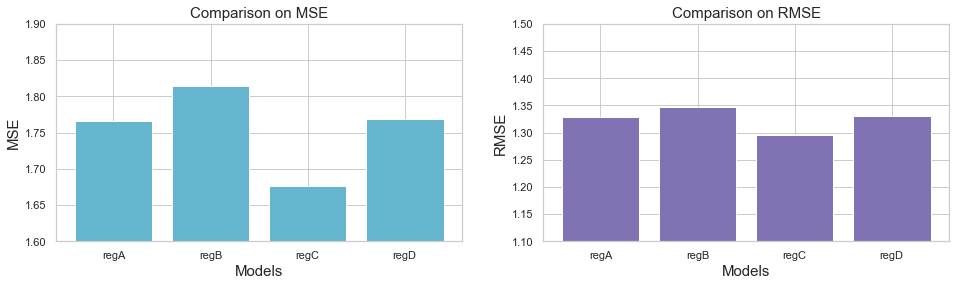

In [14]:
# create dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [mse_a, mse_b, mse_c, mse_d]}, index=['regA', 'regB', 'regC', 'regD']) 
rmse_df = pd.DataFrame({'rmse': [root_mse_a, root_mse_b, root_mse_c, root_mse_d]}, index=['regA', 'regB', 'regC', 'regD'])   

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1.6,1.9)
plt.xlabel('Models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['regA', 'regB', 'regC', 'regD'], color='c')
plt.subplot(1, 2, 2)
plt.ylim(1.1,1.5)
plt.xlabel('Models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['regA', 'regB', 'regC', 'regD'], color='m')

#### Impact of Training/Testing Data Size on Model Performance (Model A vs. Model C)

Model A, with a smaller training size (10%), shows higher MSE (1.766) and RMSE (1.328) compared to Model C, which uses a larger training size (90%). A larger training dataset improves prediction accuracy as the model learns from more comprehensive data, while a smaller training size increases the likelihood of errors due to limited learning. This highlights the critical role of training/testing data size in determining model performance.

#### Impacts of Feature Selection on Model Performance  

Model C demonstrates superior performance over Model D, achieving lower MSE and RMSE. This outcome aligns with the hypothesis that highly correlated predictor variables (category and review) yield more accurate predictions compared to less correlated features (helpfulness and gender).

### Conclusion

Model C, trained with 90% of the data and using the most correlated features, outperforms the other models, as indicated by its lowest MSE and RMSE values, which suggest more accurate predictions. This highlights that models with highly correlated features and larger training datasets tend to perform better. However, the minor performance variations across different settings suggest that the chosen input features do not strongly contribute to accurate rating predictions.